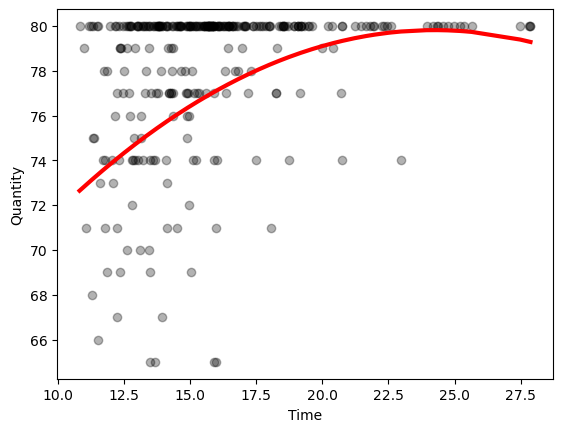

R-Squared: -0.11608932353471446
Mean Squared Error: 12.670963278023086
Mean Absolute Error: 2.877543615949063
Median Absolute Error: 2.7246401401286704
RMSE: 3.5596296546162054


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split



# subfolder = 'Project/'       # Terminal
subfolder = '../'         # Jupyter
data = pd.read_csv(f'{subfolder}Dataset/Andrea Muzii - Numbers.txt')
data = data.sort_values(by='47.26', ignore_index=True)


mask1 = data.iloc[:, 0] != 80
mask2 = data.iloc[:, 1] > np.percentile(data.iloc[:, 1], 95)
data = data.drop(data[np.logical_and(mask1, mask2)].index)

####### CUT #######
mask = data.iloc[:, 1] > 40
data = data.drop(data[mask].index)
convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
mask = data.iloc[:, 1] > convergence + 5
data = data.drop(data[mask].index)
#######     #######

mask = data.iloc[:, 0] < 65
data = data.drop(data[mask].index)
# mask = data.iloc[:, 0] == 80
# data = data.drop(data[mask].index)

# dx_original = data.iloc[:, 1]
# dx = []
# for el in list(dx_original):
#     dx.append(el) if el >= m else dx.append(m)
x = np.array(data.iloc[:, 1]).reshape(-1,1)
y = np.array(data.iloc[:, 0])
w = 1/y**8

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



poly = PolynomialFeatures()
reg = LinearRegression()

x_poly = poly.fit_transform(x)
reg.fit(x_poly, y, w)

# y_pred = []
# for el in reg.predict(x_poly):
#     y_pred.append(round(el))
# y_pred = np.array(y_pred)
y_pred = reg.predict(x_poly)

plt.scatter(x, y,  color='black', alpha=0.3)
plt.plot(x, y_pred, color='red', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.show()


# Performance Measures
r2 = r2_score(y, y_pred)
print("R-Squared:", r2)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)
mdae = median_absolute_error(y, y_pred)
print("Median Absolute Error:", mdae)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
